In [1]:
!pip install -q scikit-learn pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cardekho_dataset.csv to cardekho_dataset.csv


In [4]:
df = pd.read_csv('cardekho_dataset.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


In [6]:
df['mileage'].fillna(df['mileage'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

<ipython-input-6-9e0bfcf4d3cd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(), inplace=True)
<ipython-input-6-9e0bfcf4d3cd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [7]:
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df['model'] = le.fit_transform(df['model'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['transmission_type'] = le.fit_transform(df['transmission_type'])
df['vehicle_age'] = df['vehicle_age'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,1,Hyundai Grand,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,2,Hyundai i20,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,3,Maruti Alto,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,4,Ford Ecosport,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


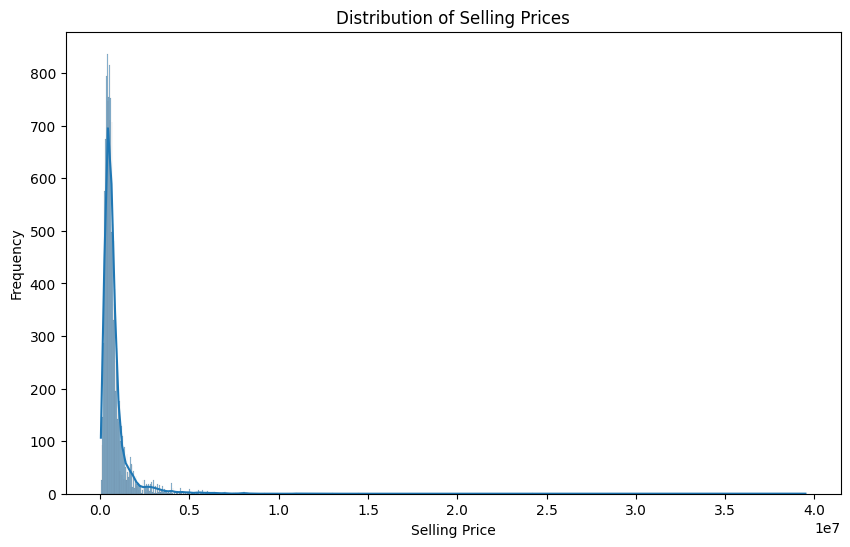

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


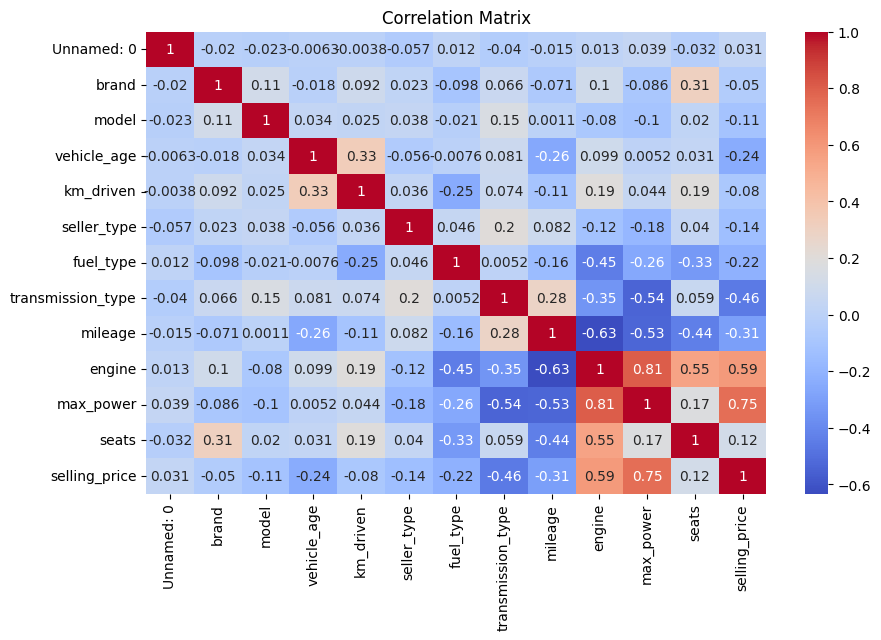

In [69]:

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [70]:

X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for col in ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']:
    le = LabelEncoder()

    le.fit(pd.concat([X_train[col], X_test[col]], axis=0).astype(str))

    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

X_train = X_train.select_dtypes(include=np.number)
X_test = X_test.select_dtypes(include=np.number)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score (Accuracy):", r2_score(y_test, y_pred_rf))


Random Forest Model Evaluation:
Mean Absolute Error: 95063.21277975997
Mean Squared Error: 46417143472.080765
Root Mean Squared Error: 215446.38189600856
R² Score (Accuracy): 0.9383391786851197


In [74]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score (Accuracy):", r2_score(y_test, y_pred_rf))


Linear Regression Model Evaluation:
Mean Absolute Error: 270629.2274885956
Mean Squared Error: 242954482208.61194
Root Mean Squared Error: 492904.1308496125
R² Score (Accuracy): 0.9383391786851197


In [76]:
# Example input (replace with actual values)
example_car = {
    'brand': 'Toyota',  # Enter the brand
    'model': 'Corolla',  # Enter the model
    'vehicle_age': 5,  # Enter vehicle age
    'km_driven': 50000,  # Enter km driven
    'seller_type': 'Individual',  # Enter seller type
    'fuel_type': 'Petrol',  # Enter fuel type
    'transmission_type': 'Manual',  # Enter transmission type
    'mileage': 18,  # Enter mileage
    'engine': 1500,  # Enter engine capacity
    'max_power': 90,  # Enter max power
    'seats': 5  # Enter number of seats
}



In [77]:

# Convert example input into a DataFrame
example_df = pd.DataFrame([example_car])


In [78]:
brand_le = LabelEncoder()
model_le = LabelEncoder()
seller_type_le = LabelEncoder()
fuel_type_le = LabelEncoder()
transmission_type_le = LabelEncoder()

In [79]:
brand_le.fit(pd.concat([df['brand'], example_df['brand']], axis=0).astype(str))
model_le.fit(pd.concat([df['model'], example_df['model']], axis=0).astype(str))
seller_type_le.fit(pd.concat([df['seller_type'], example_df['seller_type']], axis=0).astype(str))
fuel_type_le.fit(pd.concat([df['fuel_type'], example_df['fuel_type']], axis=0).astype(str))
transmission_type_le.fit(pd.concat([df['transmission_type'], example_df['transmission_type']], axis=0).astype(str))


LabelEncoder()

In [80]:
example_df['brand'] = brand_le.transform(example_df['brand'])
example_df['model'] = model_le.transform(example_df['model'])
example_df['seller_type'] = seller_type_le.transform(example_df['seller_type'])
example_df['fuel_type'] = fuel_type_le.transform(example_df['fuel_type'])
example_df['transmission_type'] = transmission_type_le.transform(example_df['transmission_type'])


In [81]:

example_df = pd.DataFrame([example_car])
training_columns = X_train.columns

example_df = example_df.reindex(columns=training_columns, fill_value=0)

for col in ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']:
    example_df[col] = le.fit_transform(example_df[col].astype(str))


example_scaled = scaler.transform(example_df)
predicted_price = rf_model.predict(example_scaled)
print("Predicted Selling Price:", predicted_price[0])

Predicted Selling Price: 509920.0
